In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Datasets under df variable

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/penguins_size.csv')
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
# Pang-check ng missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Check for Missing Data (Alternative Method)

df.isnull().sum() # magbilang ng missing data (NaN)

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [ ]:
# Check number of classes, unique values under species column

df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
# Drop all missing data

df = df.dropna() # remove NaN values in the dataset, 10 data dropped (344 - 10 = 334)
df.isnull().sum() # check missing data

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
# Check unique values of sex

df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
# Check the specific data (kung nasaan yung sex na tuldok)

df[df['sex'] == '.'] # Hanapin mo yung data na may 'sex' na tuldok (.)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
# Check for the closest (probable) values in terms of Mean (Average)

df[df['species'] == 'Gentoo'].groupby('sex').describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [ ]:
# Check data 336 again

df.loc[336]

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,.


In [ ]:
# Replace "." value with FEMALE, pumunta ka sa data number 336, palitan yung 'sex' ng 'FEMALE'

df.at[336, 'sex'] = 'FEMALE'

In [ ]:
df['sex'].unique() # I-check ulit kung dalawa na lang talaga ang sex values (MALE or FEMALE)

array(['MALE', 'FEMALE'], dtype=object)

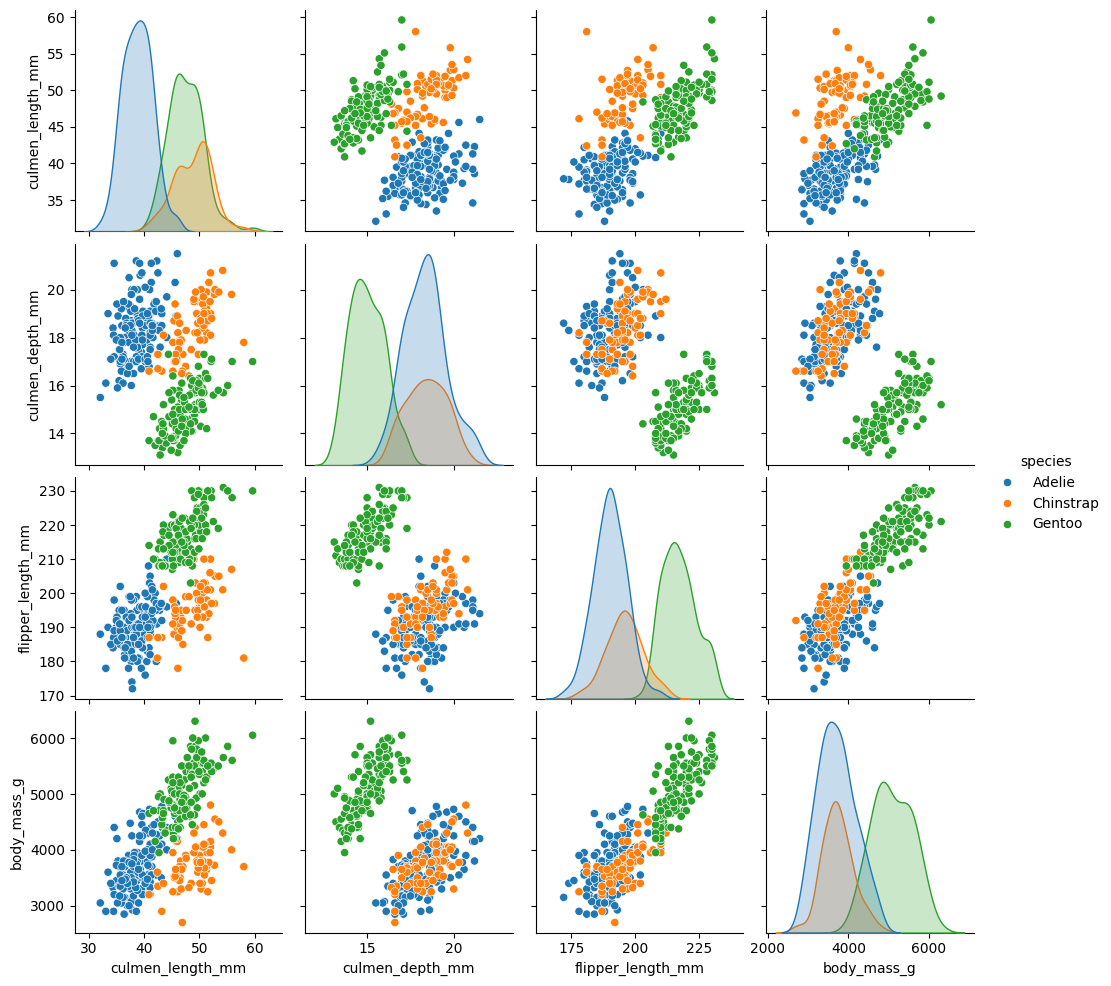

In [ ]:
# Pairplot

sns.pairplot(df, hue = 'species') # Gumawa ng pairplot ng ang basis ay 'species'

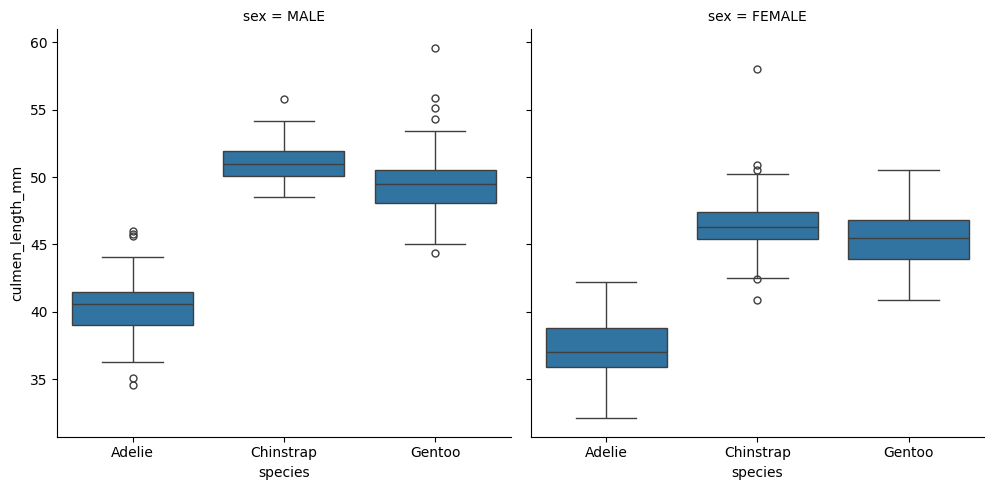

In [ ]:
# CatPlot (Category Plot)

sns.catplot(x = 'species', y = 'culmen_length_mm', data = df, kind = 'box', col = 'sex')
plt.show()

In [ ]:
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# Multiple Categorical Features/Variables (Problem 'sex', 'island' --> Non-Numerical)

X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True, dtype = int) # label encoding 0, 1 (False, True)
y = df['species']
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [ ]:
# Train - Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
# Instance of Model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 101)
model.fit(X_train, y_train) # Training ng Model

DecisionTreeClassifier(random_state=101)

In [ ]:
# Base Predictions (Default Settings)

base_preds = model.predict(X_test) # Prediction (based from X_test)
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [ ]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



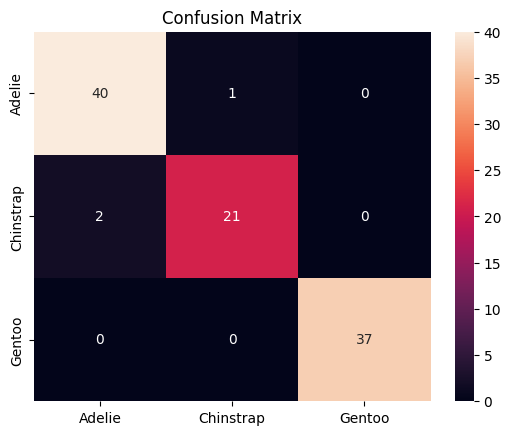

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, base_preds)
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels = ['Adelie', 'Chinstrap', 'Gentoo'], cbar = True).set(title = 'Confusion Matrix')
plt.show()

In [ ]:
# Decision Tree Model Attributes

ft = pd.DataFrame(index = X.columns, columns = ['Feature Importance'],
                  data = model.feature_importances_) # Eto ay gagawa ka ng Table
ft.sort_values(by = 'Feature Importance', ascending = False) # Eto ang pang-sort ng values in descending order

,Feature Importance
flipper_length_mm,0.542829
culmen_length_mm,0.325918
island_Dream,0.078360
culmen_depth_mm,0.052893
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000


In [ ]:
# This is how to do a text representation of decision trees (Text Version)

from sklearn import tree

text_representation = tree.export_text(model, feature_names = X.columns.tolist())
print(text_representation)

|--- flipper_length_mm <= 206.50
|   |--- culmen_length_mm <= 42.35
|   |   |--- class: Adelie
|   |--- culmen_length_mm >  42.35
|   |   |--- island_Dream <= 0.50
|   |   |   |--- flipper_length_mm <= 200.00
|   |   |   |   |--- class: Adelie
|   |   |   |--- flipper_length_mm >  200.00
|   |   |   |   |--- class: Gentoo
|   |   |--- island_Dream >  0.50
|   |   |   |--- culmen_length_mm <= 44.20
|   |   |   |   |--- culmen_depth_mm <= 17.90
|   |   |   |   |   |--- class: Chinstrap
|   |   |   |   |--- culmen_depth_mm >  17.90
|   |   |   |   |   |--- class: Adelie
|   |   |   |--- culmen_length_mm >  44.20
|   |   |   |   |--- class: Chinstrap
|--- flipper_length_mm >  206.50
|   |--- culmen_depth_mm <= 17.65
|   |   |--- class: Gentoo
|   |--- culmen_depth_mm >  17.65
|   |   |--- island_Dream <= 0.50
|   |   |   |--- class: Adelie
|   |   |--- island_Dream >  0.50
|   |   |   |--- class: Chinstrap



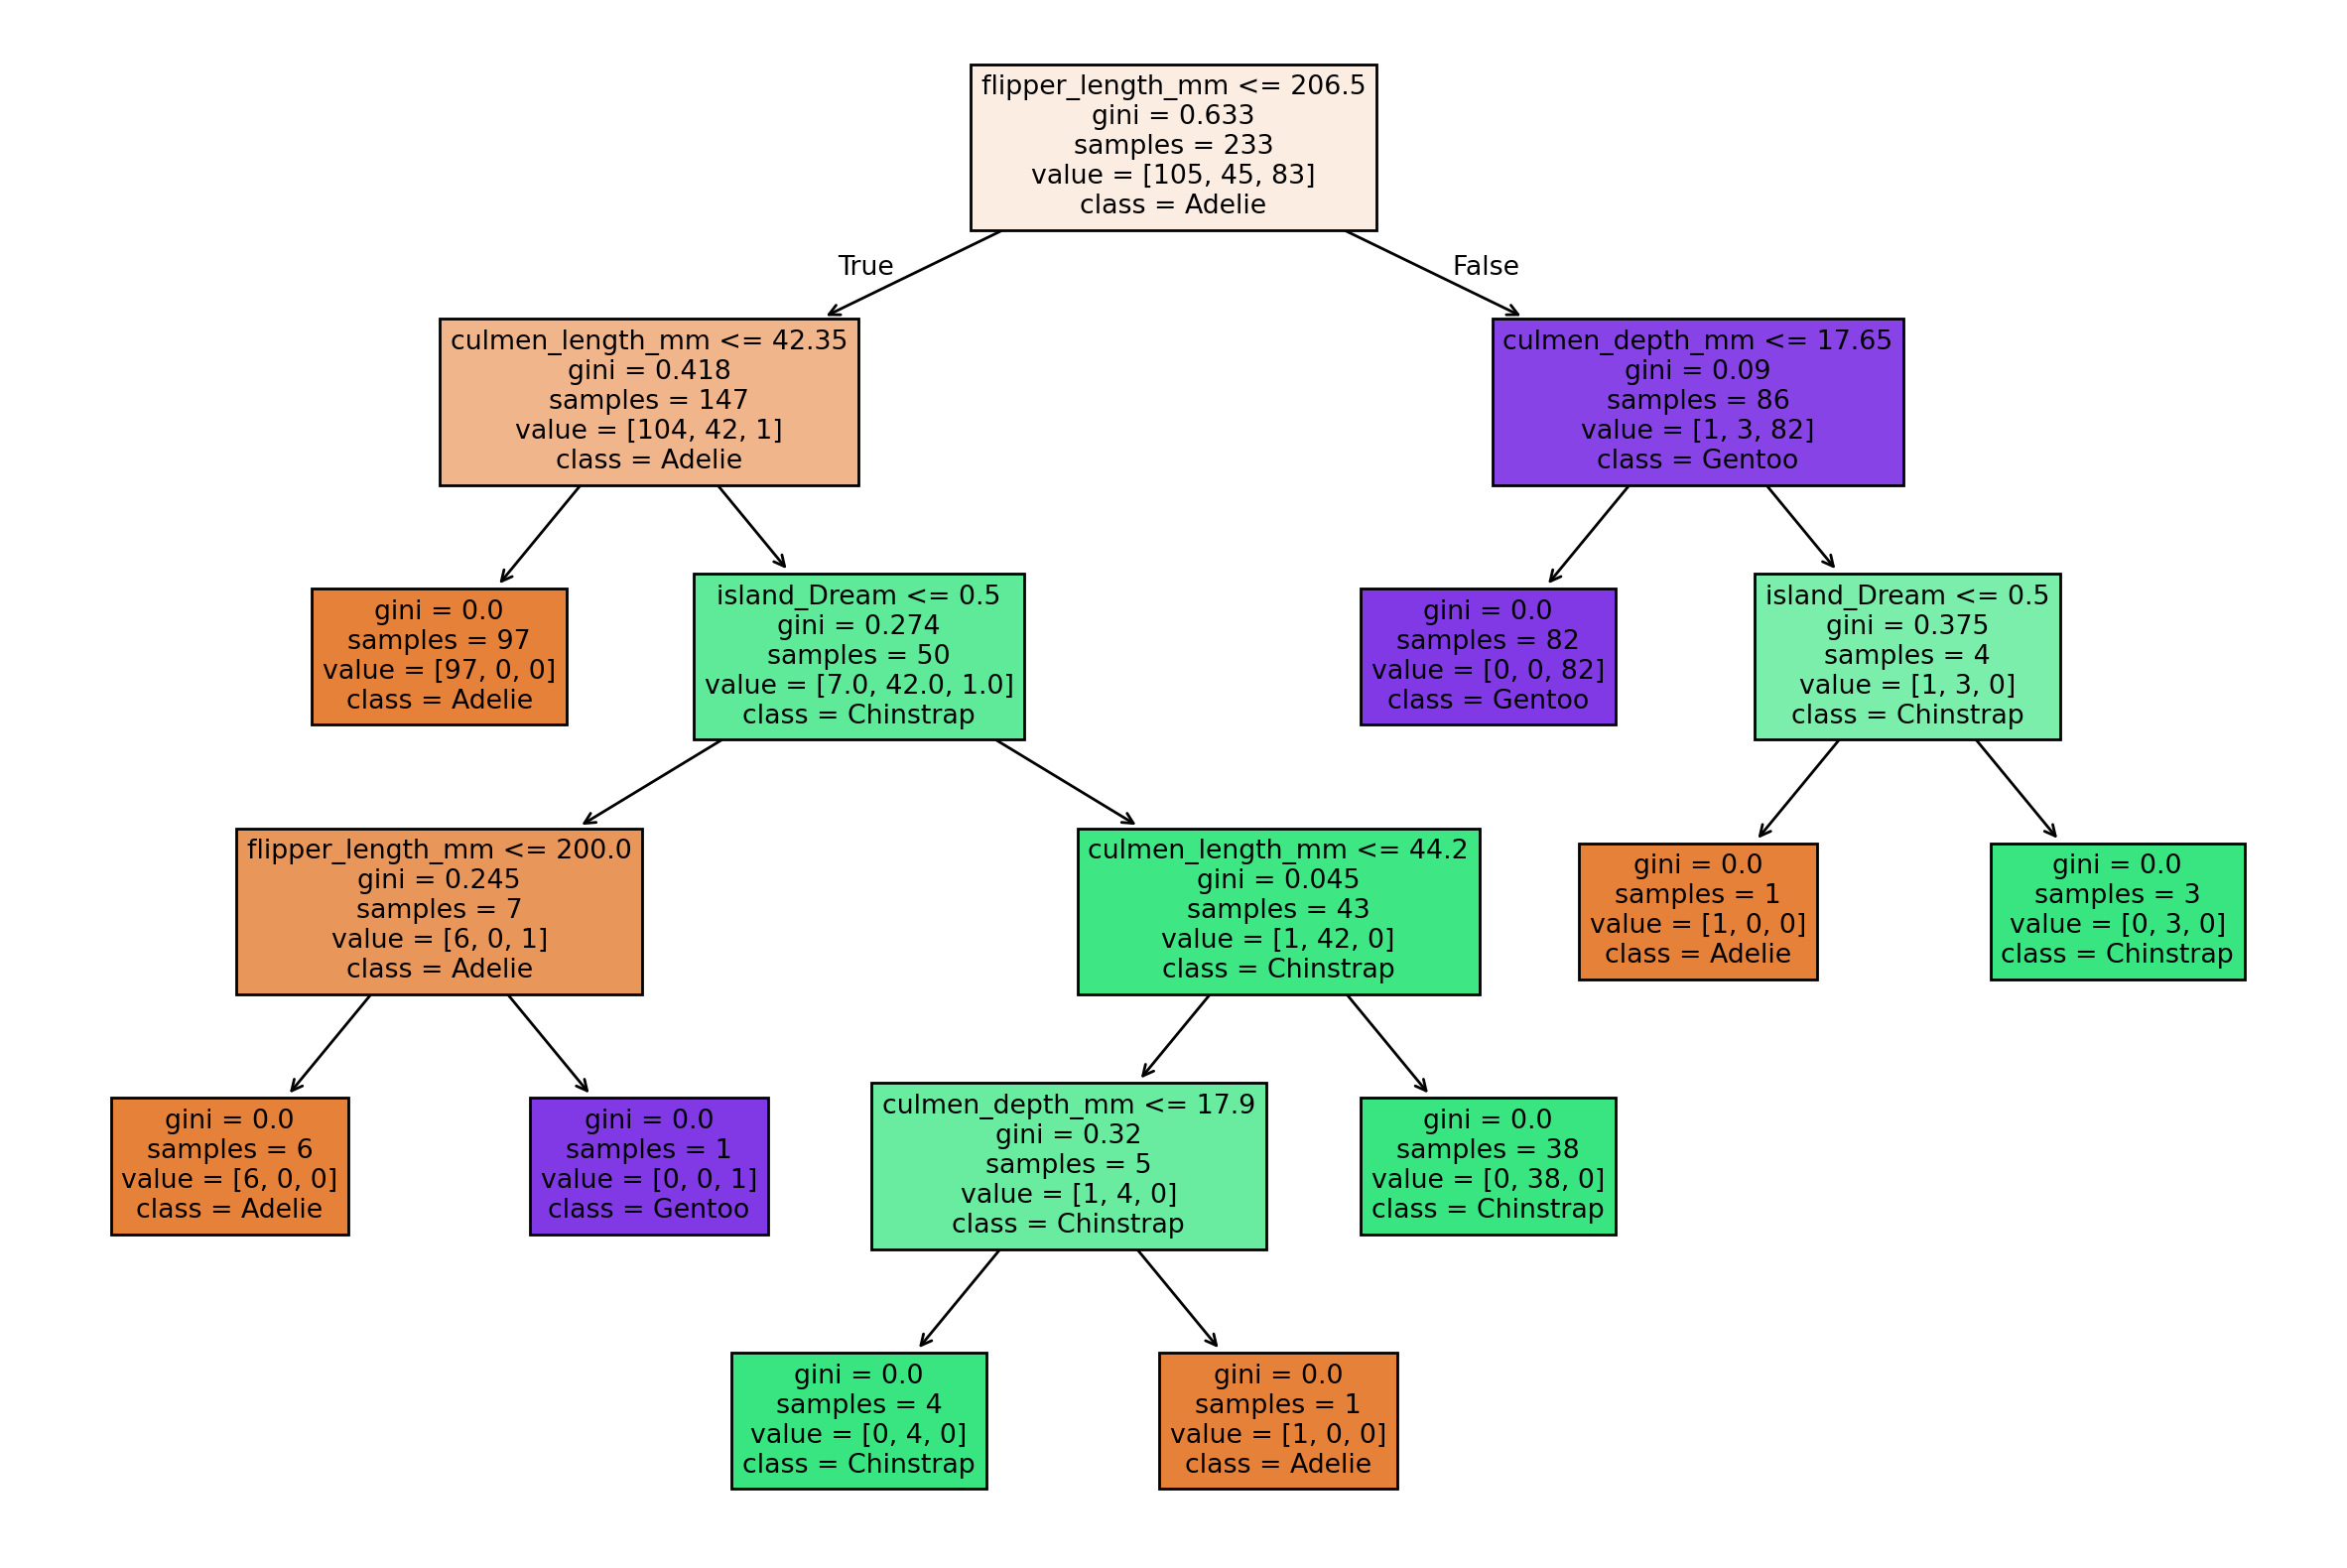

In [ ]:
# Tree Visualization (Graphical)

from sklearn.tree import plot_tree # Implementation, left (true), right (false)

plt.figure(figsize = (15,10), dpi = 200) # Eto ay pang-set ng Figure Size
plot_tree(model, feature_names = X.columns, filled = True, class_names = ['Adelie', 'Chinstrap', 'Gentoo']);

# see classification report for class arrangement

In [ ]:
# culmen_length_mm,	culmen_depth_mm,
# flipper_length_mm,	body_mass_g,	island_Dream,
# island_Torgersen,	sex_MALE

data = [[50.8,	15.7,	226.0,	5200.0,	0,	0,	1], # Gentoo
        [55.8,	18.7,	326.0,	6200.0,	1,	0,	0], # Chinstrap
        [30.8,	12.7,	166.0,	3200.0,	0,	0,	1]] # Adelie

v_data = pd.DataFrame(data, columns = X.columns)
v_data

new_pred = model.predict(v_data)
new_pred

array(['Gentoo', 'Chinstrap', 'Adelie'], dtype=object)

In [ ]:
preds = pd.Series(new_pred, name = 'Species')
preds

,Species
0,Gentoo
1,Chinstrap
2,Adelie


In [ ]:
pd.concat([v_data, preds], axis = 1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,Species
0,50.8,15.7,226.0,5200.0,0,0,1,Gentoo
1,55.8,18.7,326.0,6200.0,1,0,0,Chinstrap
2,30.8,12.7,166.0,3200.0,0,0,1,Adelie
